In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
start = pd.Timestamp(2020,1,1)
end = pd.to_datetime('today').normalize()
btc = web.DataReader('BTC-USD', 'yahoo', start,end)
eth = web.DataReader('ETH-USD', 'yahoo', start, end)

In [3]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383


In [4]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587 entries, 2020-01-01 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       587 non-null    float64
 1   Low        587 non-null    float64
 2   Open       587 non-null    float64
 3   Close      587 non-null    float64
 4   Volume     587 non-null    float64
 5   Adj Close  587 non-null    float64
dtypes: float64(6)
memory usage: 32.1 KB


In [5]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587 entries, 2020-01-01 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       587 non-null    float64
 1   Low        587 non-null    float64
 2   Open       587 non-null    float64
 3   Close      587 non-null    float64
 4   Volume     587 non-null    float64
 5   Adj Close  587 non-null    float64
dtypes: float64(6)
memory usage: 32.1 KB


In [6]:
len(eth) == len(btc)

True

In [7]:
#let's change dtypes for our date and volume
btc.Volume = btc.Volume.astype('float64')


In [8]:
#let's check it again
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587 entries, 2020-01-01 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       587 non-null    float64
 1   Low        587 non-null    float64
 2   Open       587 non-null    float64
 3   Close      587 non-null    float64
 4   Volume     587 non-null    float64
 5   Adj Close  587 non-null    float64
dtypes: float64(6)
memory usage: 32.1 KB


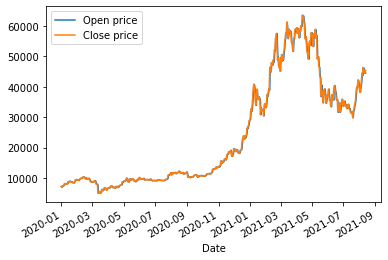

In [9]:
btc['Open'].plot(label='Open price');
btc['Close'].plot(label='Close price');
plt.legend();
plt.show();

In [10]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383


## Volume visualization

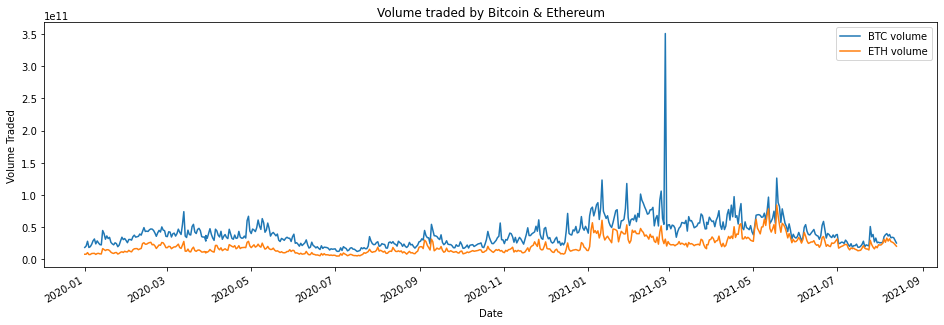

In [11]:
btc['Volume'].plot(label='BTC volume',figsize=(16,5));
eth['Volume'].plot(label='ETH volume')
plt.title('Volume traded by Bitcoin & Ethereum')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()

In [12]:
# Also we can see that 2021-03 was pick traded volume by Bitcoin, let's check it
btc.iloc[btc['Volume'].argmax()]

High         4.837079e+04
Low          4.445484e+04
Open         4.718046e+04
Close        4.633976e+04
Volume       3.509679e+11
Adj Close    4.633976e+04
Name: 2021-02-26 00:00:00, dtype: float64

In [13]:
# Let's calculate new unit, like TMT (Total money traded) for represent it.
# And we can do this with 'Open price' and 'Volume'
btc['Total Traded'] = btc['Open'] * btc['Volume']
eth['Total Traded'] = eth['Open'] * eth['Volume']

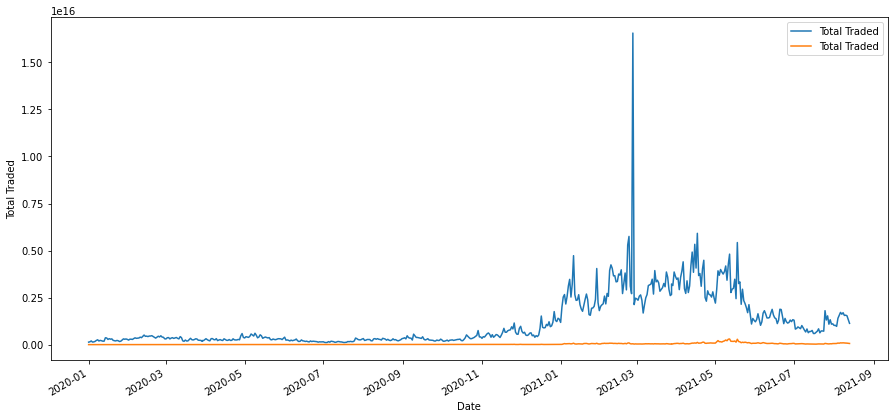

In [14]:
btc['Total Traded'].plot(figsize=(15,7));
eth['Total Traded'].plot(figsize=(15,7));
plt.legend();
plt.ylabel('Total Traded');


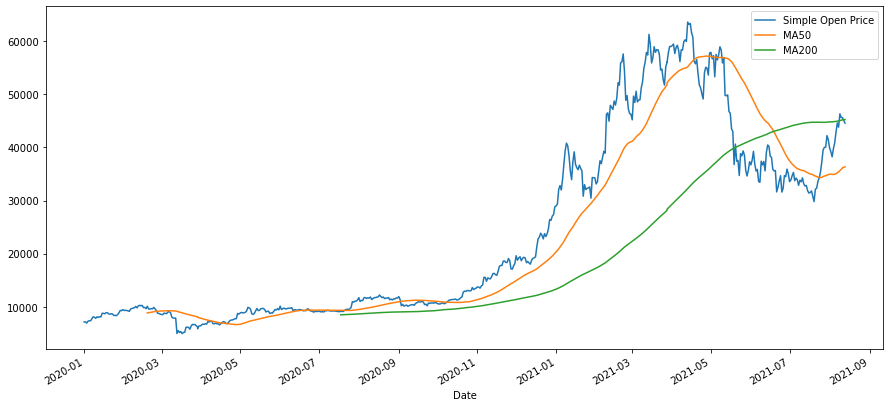

In [15]:

btc['Open'].plot(label='Simple Open Price', figsize=(15,7))
btc['MA50'] = btc['Open'].rolling(50).mean()
btc['MA50'].plot(label='MA50')
btc['MA200'] = btc['Open'].rolling(200).mean()
btc['MA200'].plot(label='MA200')
plt.legend()

## Scatter and Correaltion Matrix

In [16]:
from pandas.plotting import scatter_matrix

conc = pd.concat([btc['Open'],eth['Open']], axis=1)
conc.columns = ['BTC Opens', 'ETH Opens']

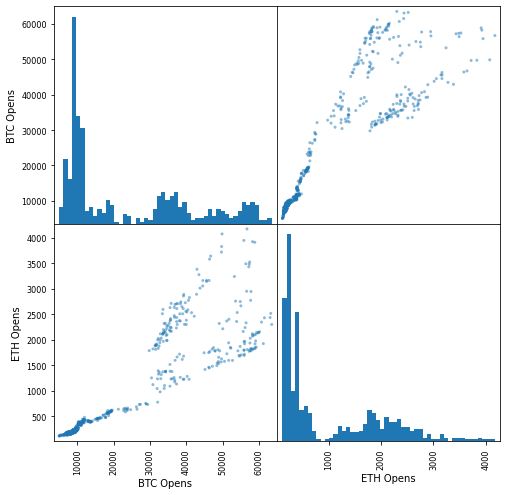

In [17]:
scatter_matrix(conc,figsize=(8,8), hist_kwds={'bins':50});


## Daily Percentage Change

In [18]:
btc['returns'] = (btc['Close'] / btc['Close'].shift(1)) - 1

In [19]:
eth['returns'] = (eth['Close'] / eth['Close'].shift(1)) - 1

In [20]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,1.335780e+14,NaN,NaN,NaN
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,1.498281e+14,NaN,NaN,-0.029819
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,1.963426e+14,NaN,NaN,0.051452
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,1.354801e+14,NaN,NaN,0.008955
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,1.461717e+14,NaN,NaN,0.000089


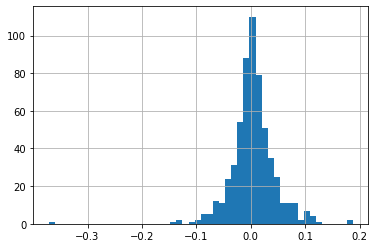

In [21]:
btc['returns'].hist(bins=50);

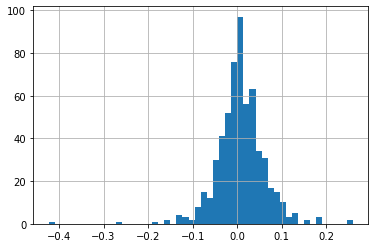

In [22]:
eth['returns'].hist(bins=50);

ETH more volability than BTC

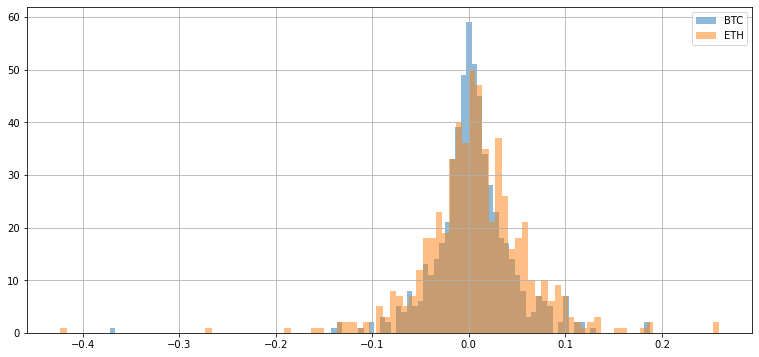

In [23]:
btc['returns'].hist(bins=100, label='BTC', alpha=.5, figsize=(13,6));
eth['returns'].hist(bins=100, label='ETH', alpha=.5);
plt.legend();

## Cumulative Return
It's help us evaluate worth of my for example one dollar for example if invest bitcoin in 2014 year, how many dollars I come back in 2021. For example:<br/>


| Date    | Price  | 
|---|---|
| 01/01/2020      |  10 |  
| 01/02/2020   |       15  |   
| 01/03/2020   |  20 |  
| 01/04/2020   | 25  |   

|  Daily Return | Cumulative Returns  |% Cumulative Returns  |
|---|---|---|
| 01/02/2020  | 15/10  | 150 %|
|  01/03/2020 | 20/10  | 200 %|
|  01/04/2020 | 25/10  | 250 %|

In [24]:
btc['Cumulative Returns'] = (1 + btc['returns']).cumprod()
eth['Cumulative Returns'] = (1 + eth['returns']).cumprod()

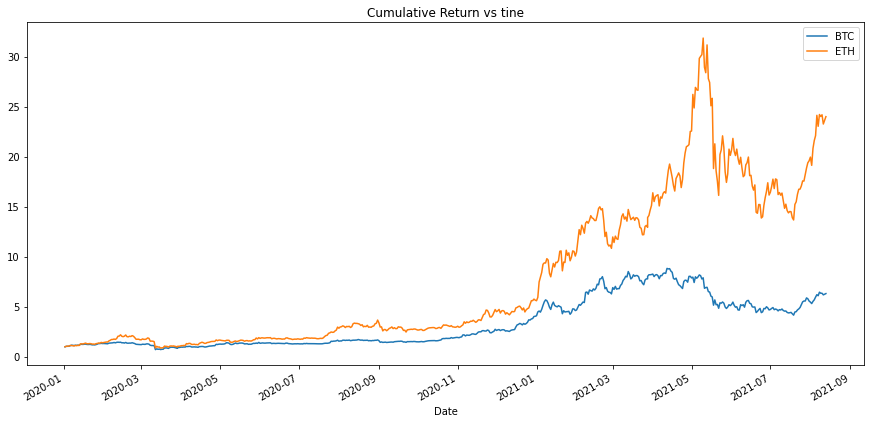

In [25]:
btc['Cumulative Returns'].plot(label='BTC', figsize=(15,7))
eth['Cumulative Returns'].plot(label='ETH')
plt.title('Cumulative Return vs tine')
plt.legend()

## Summary

So, we analysised BTC and ETH stock price, it's was little 'poor' for somebody, I just beginner and I hope you sorry me for that, thanks)